In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.feature_selection import SelectKBest, f_regression, f_classif

from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

warnings.filterwarnings("ignore", category=RuntimeWarning) 
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [85]:
merged = pd.read_csv(path+'data/merged.csv')
processed = pd.read_csv(path+'data/processed.csv')

In [86]:
merged.head(1)

,season,round,circuit_id,country,lat,long,date,driver,date_of_birth,nationality,...,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_pos,qual_time,stage,q_delta,starting_grid
0,2014,1,albert_park,Australia,-37.8497,144.968,2014-03-16 06:00:00,nico_rosberg,1985-06-27,German,...,1,1,25,1,2,3,104.595,q3,0.0,3


In [87]:
df = merged.copy()
df = df[df.season < 2022]
df.podium = df.podium.map(lambda x: 1 if x == 1 else 0)
df = pd.get_dummies(df, columns=['driver', 'constructor', 'circuit_id', 'country', 'nationality', 'stage']).drop(['date_of_birth', 'lat', 'long', 'date'], axis=1)


X = df.drop('podium', axis=1)
y = df.podium

# Select the top k best features using the f_regression method
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

# Get the names and scores of the selected features
scores = selector.scores_
feature_names = X.columns

# Sort the features by score

features = sorted(zip(scores, feature_names), reverse=True)

scores, feature_names = zip(*sorted(zip(scores, feature_names), reverse=True))

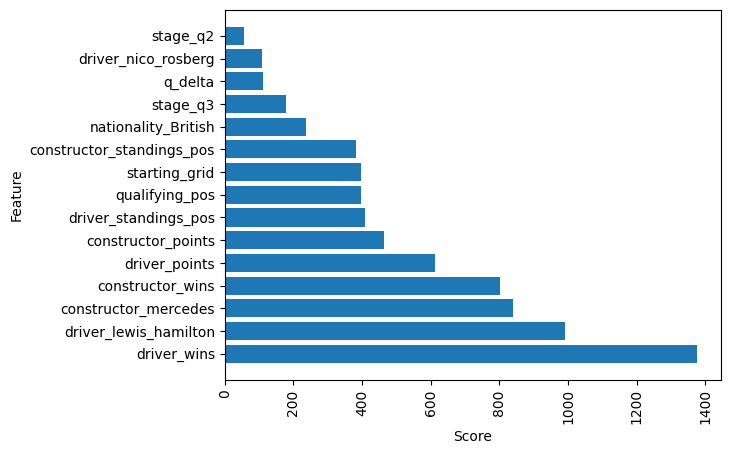

In [88]:
# Plot the scores as a bar chart
k = 15
plt.barh(feature_names[:k], scores[:k])
plt.xlabel("Score")
plt.ylabel("Feature")
plt.xticks(rotation=90)
plt.show()

In [100]:
# linear regression feature importance
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LinearRegression

# define and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate the permutation importance of the features
perm = PermutationImportance(model).fit(X, y)

# Sort the features by importance
imp_df = eli5.explain_weights_df(perm, feature_names=list(X.columns))
imp_df = imp_df.sort_values("weight", ascending=False)

# Print the top k features
print(imp_df[:15])

                      feature    weight       std
0                 driver_wins  0.567777  0.010183
1               driver_points  0.102987  0.008562
2              qualifying_pos  0.069153  0.004755
3               starting_grid  0.031527  0.002704
4        driver_standings_pos  0.028830  0.002963
5                    stage_q3  0.024954  0.001390
6        constructor_mercedes  0.023013  0.001253
7                    stage_q1  0.021506  0.003253
8       driver_lewis_hamilton  0.018909  0.003055
9          constructor_points  0.013803  0.001859
10           constructor_wins  0.011591  0.001087
11                      round  0.004094  0.001821
12  constructor_standings_pos  0.002542  0.000619
13    constructor_force_india  0.002027  0.000343
14        constructor_renault  0.001327  0.000534
